<a href="https://colab.research.google.com/github/YusukeKutomi/Track-Job-tutorial/blob/main/%E5%BC%9F%E5%AD%90%E5%85%A5%E3%82%8A%E8%AA%B2%E9%A1%8C%E6%9C%80%E7%B5%82%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Driveとの連携
from google.colab import drive
drive.mount('/content/drive')

#必要なもののインポート
import csv
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from tqdm import tqdm
import matplotlib.pyplot as plt

#警告の無視
import warnings
warnings.simplefilter('ignore', FutureWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ファイルの読み込み
df=pd.read_csv('/content/drive/MyDrive/研究室関連/L003_F002_元データ_車間距離&相対速度&PML(new).csv')

In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/研究室関連/L003_F002_元データ_車間距離&相対速度_fwd.csv')

In [ ]:
#時刻の修正
time=df['time']
H = np.trunc(time/10000000)
M = np.trunc((time - H*10000000)/100000)
S = np.trunc((time - H*10000000 - M*100000)/1000)
F = np.trunc((time - H*10000000 - M*100000 - S*1000)/100)
TIME = H*3600 + M*60 + S + F*0.1
df['sec'] = TIME
df['sec']=df['sec']-df['sec'].min()

In [ ]:
time=dff['time']
H = np.trunc(time/10000000)
M = np.trunc((time - H*10000000)/100000)
S = np.trunc((time - H*10000000 - M*100000)/1000)
F = np.trunc((time - H*10000000 - M*100000 - S*1000)/100)
TIME = H*3600 + M*60 + S + F*0.1
dff['sec'] = TIME
dff['sec']=dff['sec']-dff['sec'].min()

In [ ]:
#車頭時間の挿入
df['headtime']=df['distance']/df['m/s']

In [ ]:
#追越車線、kp<2400に絞る
df=df[df['kp']<2400]
df=df[df['lane']==2]

In [ ]:
#追越車線、kp<2400に絞る
dff=dff[dff['kp']<2400]
dff=dff[dff['lane']==2]

In [ ]:
#走行距離の挿入
# IDごとにグループ化し、kpの最大値と最小値を計算
run = df.groupby('ID')['kp'].agg(['max', 'min'])

# 最大値から最小値を引いて、新しい列'run'に格納
run['run'] = run['max'] - run['min']


# runのインデックスをリセット
run = run.reset_index()

# dfとrunをIDをキーにしてマージ
df = pd.merge(df, run[['ID', 'run']], on='ID', how='left')

#走行距離の絞り込み
df=df[df['run']>300]

#結果の確認
df

,ID,time,type,velocity,lane,kp,sec,distance,relative_v,block,light_velocity,m/s,acc,headtime,run
0,1,94000500,1,53.9,2,1838.9,0.0,109.9,-22.8,1.0,NaN,14.972222,NaN,7.340260,560.7
1,1,94000600,1,53.8,2,1840.4,0.1,65.4,-13.2,1.0,NaN,14.944444,NaN,4.376208,560.7
2,1,94000700,1,53.5,2,1842.0,0.2,65.5,-14.1,1.0,NaN,14.861111,NaN,4.407477,560.7
3,1,94000800,1,53.1,2,1843.5,0.3,65.7,-15.1,1.0,NaN,14.750000,NaN,4.454237,560.7
4,1,94000900,1,52.5,2,1845.0,0.4,65.9,-16.4,1.0,NaN,14.583333,NaN,4.518857,560.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869972,2961,100200700,2,51.5,2,2393.7,1320.2,53.9,-0.9,4.0,35.0,14.305556,0.222222,3.767767,358.1
869973,2961,100200800,2,51.7,2,2395.1,1320.3,54.2,-0.8,4.0,35.0,14.361111,0.277778,3.774081,358.1
869974,2961,100200900,2,52.0,2,2396.6,1320.4,54.3,-0.6,4.0,35.0,14.444444,0.361111,3.759231,358.1
869975,2961,100201000,2,52.3,2,2398.0,1320.5,54.5,-0.4,4.0,35.0,14.527778,0.416667,3.751434,358.1


In [ ]:
#車間距離の挿入
# IDごとにグループ化し、distanceの差分を計算する
df['distance_diff'] = df.groupby('ID')['distance'].diff(1)

# IDの最初の行のdistance_diffを0にする
df.loc[df.groupby('ID').head(1).index, 'distance_diff'] = 0

# 結果の確認
df

,ID,time,type,velocity,lane,kp,sec,distance,relative_v,block,light_velocity,m/s,acc,headtime,run,distance_diff
0,1,94000500,1,53.9,2,1838.9,0.0,109.9,-22.8,1.0,NaN,14.972222,NaN,7.340260,560.7,0.0
1,1,94000600,1,53.8,2,1840.4,0.1,65.4,-13.2,1.0,NaN,14.944444,NaN,4.376208,560.7,-44.5
2,1,94000700,1,53.5,2,1842.0,0.2,65.5,-14.1,1.0,NaN,14.861111,NaN,4.407477,560.7,0.1
3,1,94000800,1,53.1,2,1843.5,0.3,65.7,-15.1,1.0,NaN,14.750000,NaN,4.454237,560.7,0.2
4,1,94000900,1,52.5,2,1845.0,0.4,65.9,-16.4,1.0,NaN,14.583333,NaN,4.518857,560.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869972,2961,100200700,2,51.5,2,2393.7,1320.2,53.9,-0.9,4.0,35.0,14.305556,0.222222,3.767767,358.1,0.1
869973,2961,100200800,2,51.7,2,2395.1,1320.3,54.2,-0.8,4.0,35.0,14.361111,0.277778,3.774081,358.1,0.3
869974,2961,100200900,2,52.0,2,2396.6,1320.4,54.3,-0.6,4.0,35.0,14.444444,0.361111,3.759231,358.1,0.1
869975,2961,100201000,2,52.3,2,2398.0,1320.5,54.5,-0.4,4.0,35.0,14.527778,0.416667,3.751434,358.1,0.2


In [ ]:
df

,ID,time,type,velocity,lane,kp,sec,distance,relative_v,block,light_velocity,m/s,acc,headtime,run,distance_diff
0,1,94000500,1,53.9,2,1838.9,0.0,109.9,-22.8,1.0,NaN,14.972222,NaN,7.340260,560.7,0.0
1,1,94000600,1,53.8,2,1840.4,0.1,65.4,-13.2,1.0,NaN,14.944444,NaN,4.376208,560.7,-44.5
2,1,94000700,1,53.5,2,1842.0,0.2,65.5,-14.1,1.0,NaN,14.861111,NaN,4.407477,560.7,0.1
3,1,94000800,1,53.1,2,1843.5,0.3,65.7,-15.1,1.0,NaN,14.750000,NaN,4.454237,560.7,0.2
4,1,94000900,1,52.5,2,1845.0,0.4,65.9,-16.4,1.0,NaN,14.583333,NaN,4.518857,560.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869972,2961,100200700,2,51.5,2,2393.7,1320.2,53.9,-0.9,4.0,35.0,14.305556,0.222222,3.767767,358.1,0.1
869973,2961,100200800,2,51.7,2,2395.1,1320.3,54.2,-0.8,4.0,35.0,14.361111,0.277778,3.774081,358.1,0.3
869974,2961,100200900,2,52.0,2,2396.6,1320.4,54.3,-0.6,4.0,35.0,14.444444,0.361111,3.759231,358.1,0.1
869975,2961,100201000,2,52.3,2,2398.0,1320.5,54.5,-0.4,4.0,35.0,14.527778,0.416667,3.751434,358.1,0.2


In [ ]:
dff

,ID,time,type,velocity,lane,kp,sec,distance,relative_v,fwdID,curvature_radius,longitudinal_slope,transverse_slope,block,light_velocity
1465,1,94000500,1,53.9,2,1838.9,0.0,109.9,-22.8,2372.0,3656.940,-4.0,-1.5,1.0,NaN
1466,1,94000600,1,53.8,2,1840.4,0.1,65.4,-13.2,2338.0,3656.940,-4.0,-1.5,1.0,NaN
1467,1,94000700,1,53.5,2,1842.0,0.2,65.5,-14.1,2338.0,12673.961,-4.0,-1.5,1.0,NaN
1468,1,94000800,1,53.1,2,1843.5,0.3,65.7,-15.1,2338.0,12673.961,-4.0,-1.5,1.0,NaN
1469,1,94000900,1,52.5,2,1845.0,0.4,65.9,-16.4,2338.0,12673.961,-4.0,-1.5,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688541,2979,94004000,1,55.9,2,2392.6,3.5,35.9,-6.9,2978.0,43000.000,-0.3,-1.5,4.0,NaN
5688542,2979,94004100,1,56.1,2,2394.2,3.6,36.3,-7.0,2978.0,43000.000,-0.3,-1.5,4.0,NaN
5688543,2979,94004200,1,56.3,2,2395.9,3.7,36.4,-7.2,2978.0,43000.000,-0.3,-1.5,4.0,NaN
5688544,2979,94004300,1,56.5,2,2397.5,3.8,36.7,-7.3,2978.0,43000.000,-0.3,-1.5,4.0,NaN


In [ ]:
#車両のグループ化
veh_list = pd.DataFrame(columns=['ID','v','type','kp','run','distance','headtime','longitudinal_slope','curvature_radius'])
for veh in tqdm(df['ID'].unique()):
    df_veh = df[df['ID'] == veh]
    dff_veh = dff[dff['ID'] == veh]
    v = df_veh['velocity'].mean()
    type = (df_veh['type'].iloc[0],dff_veh['type'].iloc[0]) #added parenthesis
    kp = df_veh['kp'].mean()
    run = df_veh['run'].mean()
    distance = df_veh['distance'].mean()
    headtime = df_veh['headtime'].mean()
    longitudinal_slope = dff_veh['longitudinal_slope'].mean()
    curvature_radius = dff_veh['curvature_radius'].mean()
    new_row = {
        'ID': veh,
        'v': v,
        'type': df_veh['type'].iloc[0],
        'kp': kp,
        'run':run,
        'distance': distance,
        'headtime': headtime,
        'longitudinal_slope': longitudinal_slope,
        'curvature_radius': curvature_radius,

    } #added closing curly brace
    veh_list = pd.concat([veh_list, pd.DataFrame([new_row])], ignore_index=True)

100%|██████████| 1469/1469 [00:07<00:00, 190.35it/s]


In [ ]:
veh_list

,ID,v,type,kp,run,distance,headtime,longitudinal_slope,curvature_radius
0,1,74.250355,1,2105.739362,560.7,35.593617,1.757557,-2.281206,21598.705376
1,3,75.624306,1,2097.907292,571.9,38.385069,1.842364,-2.342708,20955.324639
2,4,74.496575,1,2095.127397,571.8,29.161644,1.404634,-2.352740,20767.597116
3,6,69.968092,1,2091.654934,571.8,32.049671,1.607721,-2.393421,20466.661523
4,7,64.325000,1,2094.994817,571.5,42.773780,2.294743,-2.375610,20594.393131
...,...,...,...,...,...,...,...,...,...
1464,2914,32.629367,1,2196.423797,351.8,14.172658,1.534083,-1.349114,26344.303797
1465,2930,30.641322,1,2237.802479,305.0,17.327273,1.958974,-0.646556,34707.988981
1466,2958,77.890062,1,2241.580745,319.1,24.232919,1.128685,-0.805590,33385.093168
1467,2960,76.567429,1,2223.840000,353.3,31.581714,1.492901,-1.103429,30222.857143


In [ ]:
#車両を①普通車②大型車に分類
df_normal=veh_list[veh_list['type']==1]
df_large=veh_list[veh_list['type']==2]

In [ ]:
df_normal

,ID,v,type,kp,run,distance,headtime,longitudinal_slope,curvature_radius
0,1,74.250355,1,2105.739362,560.7,35.593617,1.757557,-2.281206,21598.705376
1,3,75.624306,1,2097.907292,571.9,38.385069,1.842364,-2.342708,20955.324639
2,4,74.496575,1,2095.127397,571.8,29.161644,1.404634,-2.352740,20767.597116
3,6,69.968092,1,2091.654934,571.8,32.049671,1.607721,-2.393421,20466.661523
4,7,64.325000,1,2094.994817,571.5,42.773780,2.294743,-2.375610,20594.393131
...,...,...,...,...,...,...,...,...,...
1463,2912,36.835366,1,2218.172561,315.4,14.199695,1.391200,-0.897866,30676.829268
1464,2914,32.629367,1,2196.423797,351.8,14.172658,1.534083,-1.349114,26344.303797
1465,2930,30.641322,1,2237.802479,305.0,17.327273,1.958974,-0.646556,34707.988981
1466,2958,77.890062,1,2241.580745,319.1,24.232919,1.128685,-0.805590,33385.093168


In [ ]:
df_normal.describe()

,v,kp,run,distance,headtime,longitudinal_slope,curvature_radius
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,39.531732,2108.347799,546.275484,23.926956,2.214424,-2.231727,21360.400151
std,13.826575,37.054129,64.435944,22.353035,1.174950,0.388611,3146.965702
min,23.243576,1958.040732,300.600000,7.342717,0.729058,-4.000000,6564.923884
25%,30.872353,2088.477201,564.800000,16.501682,1.674385,-2.435178,19896.606010
50%,34.416693,2101.299250,572.900000,19.648315,2.027850,-2.286316,21125.527564
75%,41.032375,2115.787382,575.600000,24.863380,2.510381,-2.158499,22265.273995
max,88.822222,2256.979279,579.400000,512.776023,20.807756,-0.600000,36079.155673


In [ ]:
df_large

,ID,v,type,kp,run,distance,headtime,longitudinal_slope,curvature_radius
17,26,79.262921,2,2121.295880,550.5,39.791011,1.810092,-2.170787,22567.069157
24,38,78.642391,2,2111.578986,553.3,115.975725,5.333251,-2.257246,21425.736627
27,45,65.335922,2,2128.218447,551.7,30.721359,1.696600,-2.084142,23450.566964
32,53,62.971646,2,2115.147256,556.8,35.692988,2.057450,-2.228963,21827.411101
39,63,70.992256,2,2110.547475,564.0,67.642424,3.443166,-2.243434,21765.996209
...,...,...,...,...,...,...,...,...,...
1415,2359,30.923567,2,2114.408599,517.2,33.842675,3.965255,-2.244268,20910.561556
1416,2361,31.860101,2,2134.837542,510.4,25.896970,2.980885,-2.025421,22909.135177
1417,2362,33.866335,2,2123.284577,510.9,29.801658,3.267188,-2.134660,20609.511957
1436,2559,47.510853,2,2239.686047,302.9,19.034884,1.444593,-0.687209,34166.666667


In [ ]:
df_large.describe()

,v,kp,run,distance,headtime,longitudinal_slope,curvature_radius
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,38.973424,2103.499496,553.501042,31.121942,2.975196,-2.299911,20877.811848
std,12.666026,25.684771,38.587126,17.587936,1.111519,0.262903,2312.319945
min,24.207083,1979.406438,302.900000,11.420649,0.972452,-3.679257,6149.462610
25%,31.215203,2090.250601,554.775000,21.879289,2.224659,-2.432616,19988.405691
50%,34.776758,2101.552019,564.700000,26.367400,2.757954,-2.296593,21016.460973
75%,41.264725,2115.879268,570.800000,34.917895,3.488578,-2.177757,22086.691941
max,84.371721,2239.686047,577.200000,182.332411,8.476961,-0.687209,34166.666667


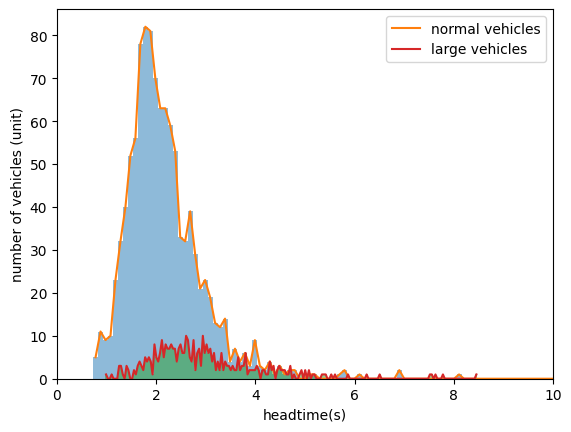

In [ ]:
plt.hist(df_normal['headtime'], bins=200, alpha=0.5)
plt.xlabel('headtime (s)')
x_min=0
x_max=10
plt.xlim(x_min,x_max)
plt.ylabel('number of vehicles (unit)')

hist, bins_n = np.histogram(df_normal['headtime'], bins=200)
bin_centers_n = (bins_n[:-1] + bins_n[1:]) / 2
plt.plot(bin_centers_n, hist,label='normal vehicles')
median_n = np.median(df_normal['headtime'])

plt.hist(df_large['headtime'], bins=200, alpha=0.5)
plt.xlabel('headtime(s)')
x_min=0
x_max=10
plt.xlim(x_min,x_max)
plt.ylabel('number of vehicles (unit)')

hist, bins_l = np.histogram(df_large['headtime'], bins=200)
bin_centers_l = (bins_l[:-1] + bins_l[1:]) / 2
plt.plot(bin_centers_l, hist,label='large vehicles')
median_l = np.median(df_normal['headtime'])

plt.legend()
plt.show()

In [ ]:
df_normal['headtime'].describe()

,headtime
count,1085.000000
mean,2.214424
std,1.174950
min,0.729058
25%,1.674385
50%,2.027850
75%,2.510381
max,20.807756


In [ ]:
df_large['headtime'].describe()

,headtime
count,384.000000
mean,2.975196
std,1.111519
min,0.972452
25%,2.224659
50%,2.757954
75%,3.488578
max,8.476961


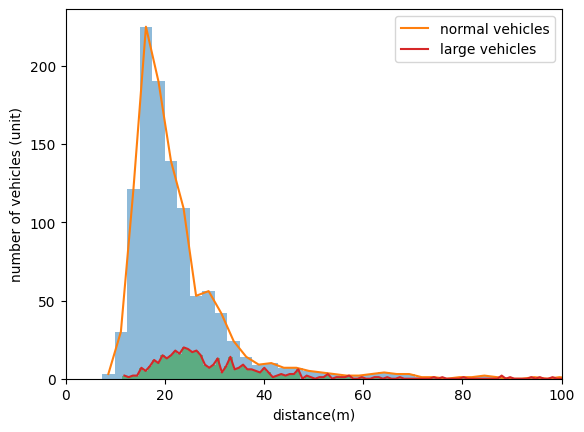

In [ ]:
plt.hist(df_normal['distance'], bins=200,alpha=0.5)
plt.xlabel('distance(m)')
x_min=0
x_max=100
plt.xlim(x_min,x_max)
plt.ylabel('number of vehicles (unit)')

hist, bins_n = np.histogram(df_normal['distance'], bins=200)
bin_centers_n = (bins_n[:-1] + bins_n[1:]) / 2
plt.plot(bin_centers_n, hist,label='normal vehicles')
median_n = np.median(df_normal['distance'])

plt.hist(df_large['distance'], bins=200,alpha=0.5)
plt.xlabel('distance(m)')
x_min=0
x_max=100
plt.xlim(x_min,x_max)
plt.ylabel('number of vehicles (unit)')

hist, bins_l = np.histogram(df_large['distance'], bins=200)
bin_centers_l = (bins_l[:-1] + bins_l[1:]) / 2
plt.plot(bin_centers_l, hist,label='large vehicles')
median_l = np.median(df_normal['distance'])

plt.legend()
plt.show()

In [ ]:
df_normal['distance'].describe()

,distance
count,1085.000000
mean,23.926956
std,22.353035
min,7.342717
25%,16.501682
50%,19.648315
75%,24.863380
max,512.776023


In [ ]:
df_large['distance'].describe()

,distance
count,384.000000
mean,31.121942
std,17.587936
min,11.420649
25%,21.879289
50%,26.367400
75%,34.917895
max,182.332411


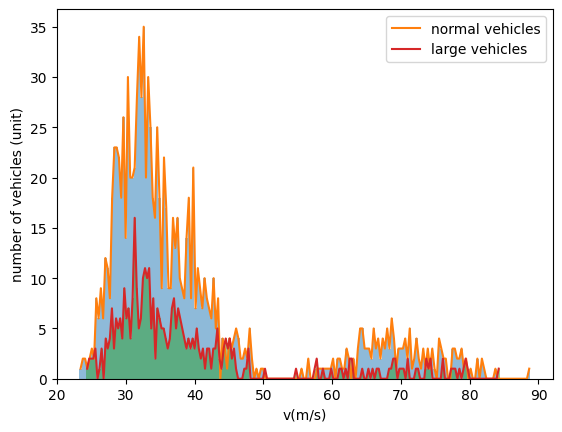

<Figure size 3000x600 with 0 Axes>

In [ ]:
plt.hist(df_normal['v'], bins=200,alpha=0.5)
plt.xlabel('v(m/s)')
plt.xticks(np.arange(0, 100, 10))
plt.ylabel('number of vehicles (unit)')

hist, bins_n = np.histogram(df_normal['v'], bins=200)
bin_centers_n = (bins_n[:-1] + bins_n[1:]) / 2
plt.plot(bin_centers_n, hist,label='normal vehicles')
median_n = np.median(df_normal['v'])

plt.hist(df_large['v'], bins=200,alpha=0.5)
plt.xlabel('v(m/s)')
plt.xticks(np.arange(0, 100, 10))
plt.ylabel('number of vehicles (unit)')

hist, bins_l = np.histogram(df_large['v'], bins=200)
bin_centers_l = (bins_l[:-1] + bins_l[1:]) / 2
plt.plot(bin_centers_l, hist,label='large vehicles')
median_l = np.median(df_normal['v'])

plt.legend()
plt.figure(figsize=(30, 6))
plt.show()

In [ ]:
df_normal['v'].describe()

,v
count,1085.000000
mean,39.531732
std,13.826575
min,23.243576
25%,30.872353
50%,34.416693
75%,41.032375
max,88.822222


In [ ]:
df_large['v'].describe()

,v
count,384.000000
mean,38.973424
std,12.666026
min,24.207083
25%,31.215203
50%,34.776758
75%,41.264725
max,84.371721


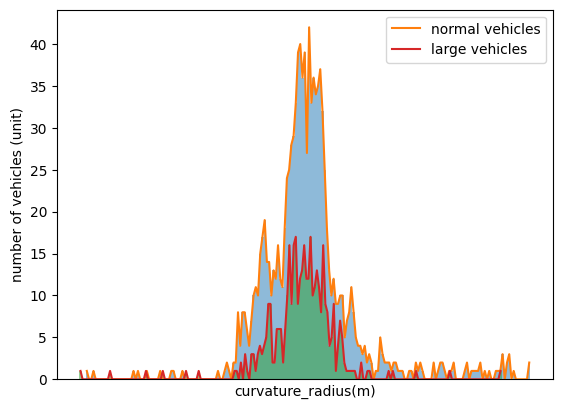

<Figure size 10000x1500 with 0 Axes>

In [ ]:
plt.hist(df_normal['curvature_radius'], bins=200,alpha=0.5)
plt.xlabel('curvature_radius(m)')
plt.xticks(np.arange(0, 4000, 100))
plt.ylabel('number of vehicles (unit)')

hist, bins_n = np.histogram(df_normal['curvature_radius'], bins=200)
bin_centers_n = (bins_n[:-1] + bins_n[1:]) / 2
plt.plot(bin_centers_n, hist,label='normal vehicles')
median_n = np.median(df_normal['curvature_radius'])

plt.hist(df_large['curvature_radius'], bins=200,alpha=0.5)
plt.xlabel('curvature_radius(m)')
plt.xticks(np.arange(0, 4000, 100))
plt.ylabel('number of vehicles (unit)')

hist, bins_l = np.histogram(df_large['curvature_radius'], bins=200)
bin_centers_l = (bins_l[:-1] + bins_l[1:]) / 2
plt.plot(bin_centers_l, hist,label='large vehicles')
median_l = np.median(df_normal['curvature_radius'])

plt.legend()
plt.figure(figsize=(100, 15))
plt.show()

In [ ]:
df_normal['curvature_radius'].describe()

,curvature_radius
count,1085.000000
mean,21360.400151
std,3146.965702
min,6564.923884
25%,19896.606010
50%,21125.527564
75%,22265.273995
max,36079.155673


In [ ]:
df_large['curvature_radius'].describe()

,curvature_radius
count,384.000000
mean,20877.811848
std,2312.319945
min,6149.462610
25%,19988.405691
50%,21016.460973
75%,22086.691941
max,34166.666667


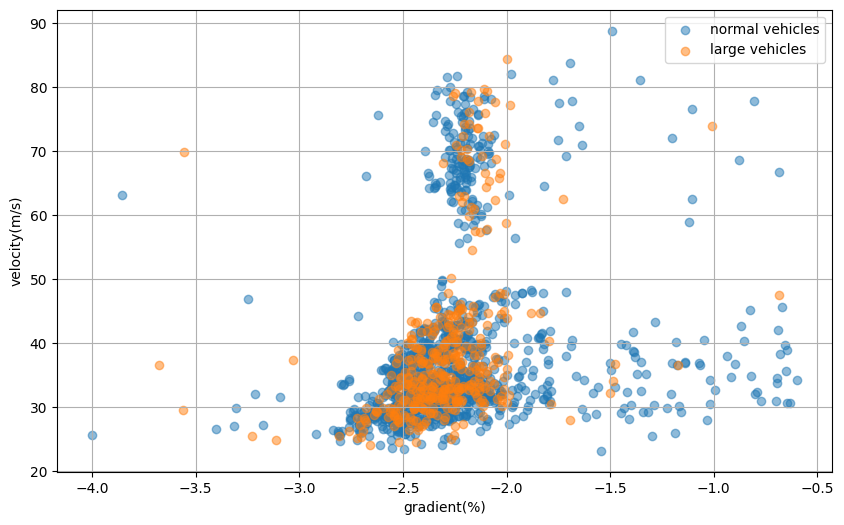

In [ ]:
import matplotlib.pyplot as plt

# 普通車両のデータ
x_normal = df_normal['longitudinal_slope']
y_normal = df_normal['v']

# 大型車両のデータ
x_large = df_large['longitudinal_slope']
y_large = df_large['v']

# グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.scatter(x_normal, y_normal, label='normal vehicles', alpha=0.5)  # 普通車両をプロット
plt.scatter(x_large, y_large, label='large vehicles', alpha=0.5)  # 大型車両をプロット
plt.xlabel('gradient(%)')  # x軸ラベル
plt.ylabel('velocity(m/s)')  # y軸ラベル
plt.legend()  # 凡例を表示
plt.grid(True)  # グリッドを表示
plt.show()  # グラフを表示